# ERDDAP tutorial with erddap-python
Using documentation from https://github.com/hmedrano/erddap-python

In [46]:
import numpy as np
import pandas as pd 
import xarray as xr
import netCDF4 as nc
import datetime as dt

# in terminal/console: conda install -c conda-forge erddap-python

from matplotlib import pyplot as plt 

On an ERDDAP server data can be stored in the form of TableDAP or GridDAP.

From OOI erddap index page:

"Tabledap lets you use the OPeNDAP hyperslab (constraint/selection) protocol to request data subsets, graphs, and maps from tabular datasets (for example, buoy data).

Griddap lets you use the OPeNDAP hyperslab protocol to request data subsets, graphs, and maps from gridded datasets (for example, satellite data and climate model data)."

All data on the OOI ERDDAP server is in TableDAP format.

### Tabledap: 
- ERDDAP_Tabledap takes args for server url and dataset ID (found on server website page for dataset)
- retrieves object of class ERDDAP_Tabledap, which contains all info on dataset
- notably lists all data as 'Variables', as opposed to Griddap's 'Variables and Dimensions'



In [24]:
from erddapClient import ERDDAP_Tabledap 

remote_td = ERDDAP_Tabledap('http://erddap.dataexplorer.oceanobservatories.org/erddap','ooi-ce01issp-sp001-07-spkirj000')
print("Datatype: ",type(remote_td))
print(remote_td)

Datatype:  <class 'erddapClient.erddap_tabledap.ERDDAP_Tabledap'>
<erddapClient.ERDDAP_Tabledap>
Title:       Coastal Endurance: Oregon Inshore Surface Piercing Profiler Mooring: Surface Piercing Profiler: Spectral Irradiance
Server URL:  http://erddap.dataexplorer.oceanobservatories.org/erddap
Dataset ID:  ooi-ce01issp-sp001-07-spkirj000
Variables: 
  time (double) 
    Standard name: time 
    Units:         seconds since 1970-01-01T00:00:00Z 
  latitude (double) 
    Standard name: latitude 
    Units:         degrees_north 
  longitude (double) 
    Standard name: longitude 
    Units:         degrees_east 
  z (double) 
    Standard name: altitude 
    Units:         m 
  spectir_412nm (double) 
    Standard name: spectir 
    Units:         microW.cm-2.nm-1 
  spectir_412nm_qc_agg (int) 
    Standard name: aggregate_quality_flag 
  spectir_412nm_qc_tests (int) 
    Standard name: spectir quality_flag 
  spectir_443nm (double) 
    Standard name: spectir 
    Units:         microW

This package has the capability of building data request URLs, the main way of tunneling into ERDDAP servers and retrieving data. This URL changes with requested variables, datatype (e.g. csv, html, netcdf), and several other constraints.

Most of the time URL generation is not necessary, between erddap-python's ability to tunnel into ERDDAP servers without the user inputting a URL (rather inputting the components which build the URL), and a URL-building feature being available on ERDDAP server's dataset websites.

In [25]:
remote_td.setResultVariables(['time','z'])
remote_td.getURL('htmlTable')

'http://erddap.dataexplorer.oceanobservatories.org/erddap/tabledap/ooi-ce01issp-sp001-07-spkirj000.htmlTable?time%2Cz'

From an object of ERDDAP_Tabledap class we can request subset of its by setting object properties (.setResultVariable), adding variable constraints (.addConstraint), and/or setting datatype (.getData or .getDataFrame (pandas)).

Variables of interest for this surface-piercing profiler set are: time, z, and a slew of irradiance at different wavelengths (spectir_412nm (violet), spectir_443nm (blue), spectir_490nm (cyan), spectir_510nm (green), spectir_555nm (yellow-green), spectir_620nm (orange), spectir_683nm (red)). 

Color approximations from https://pages.cs.wisc.edu/~yetkin/code/wavelength_to_rgb/wavelength.html.

In [41]:
remote_td.clearQuery()
responseDf = (
    remote_td.setResultVariables(['time','z','spectir_412nm','spectir_443nm','spectir_490nm','spectir_510nm','spectir_555nm','spectir_620nm', 'spectir_683nm'])
            .getDataFrame()
)
responseDf

,time (UTC),z (m),spectir_412nm (microW.cm-2.nm-1),spectir_443nm (microW.cm-2.nm-1),spectir_490nm (microW.cm-2.nm-1),spectir_510nm (microW.cm-2.nm-1),spectir_555nm (microW.cm-2.nm-1),spectir_620nm (microW.cm-2.nm-1),spectir_683nm (microW.cm-2.nm-1)
0,2014-04-17T22:28:00Z,-20.0,0.030614,0.023073,0.139625,0.220813,0.442157,-0.002197,0.005706
1,2014-04-17T22:28:00Z,-19.0,0.037231,0.030066,0.171555,0.269376,0.528362,-0.000152,0.006310
2,2014-04-17T22:28:00Z,-18.0,0.048694,0.042189,0.218303,0.344181,0.669369,0.004723,0.007052
3,2014-04-17T22:28:00Z,-17.0,0.057129,0.050411,0.250974,0.395703,0.766718,0.007724,0.007074
4,2014-04-17T22:28:00Z,-16.0,0.065813,0.059395,0.283560,0.446932,0.865479,0.013464,0.007337
...,...,...,...,...,...,...,...,...,...
49938,2022-09-27T07:53:00Z,-5.0,0.010989,-0.002785,0.010997,0.007728,-0.006375,-0.005846,0.008078
49939,2022-09-27T07:53:00Z,-4.0,0.010630,-0.002738,0.010916,0.007805,-0.006242,-0.005502,0.007749
49940,2022-09-27T07:53:00Z,-3.0,0.010466,-0.002522,0.010447,0.007654,-0.007148,-0.005562,0.007265
49941,2022-09-27T07:53:00Z,-2.0,0.010201,-0.002446,0.010259,0.007780,-0.006556,-0.005270,0.006446


This dataframe can now be treated as any pandas dataframe.

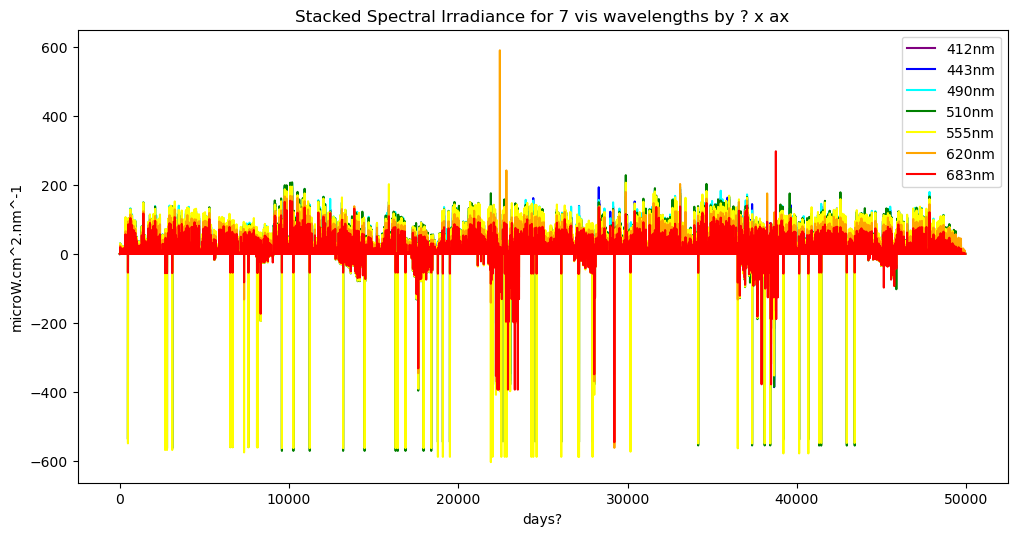

In [65]:
plt.figure(figsize=(12,6), dpi=100)
#responseDf['z (m)'].plot(label='z (m)', color='orange')
responseDf['spectir_412nm (microW.cm-2.nm-1)'].plot(label='412nm', color='purple')
responseDf['spectir_443nm (microW.cm-2.nm-1)'].plot(label='443nm', color='blue')
responseDf['spectir_490nm (microW.cm-2.nm-1)'].plot(label='490nm', color='cyan')
responseDf['spectir_510nm (microW.cm-2.nm-1)'].plot(label='510nm', color='green')
responseDf['spectir_555nm (microW.cm-2.nm-1)'].plot(label='555nm', color='yellow')
responseDf['spectir_620nm (microW.cm-2.nm-1)'].plot(label='620nm', color='orange')
responseDf['spectir_683nm (microW.cm-2.nm-1)'].plot(label='683nm', color='red')

plt.title('Stacked Spectral Irradiance for 7 vis wavelengths by ? x ax')
plt.xlabel("days?")
plt.ylabel("microW.cm^2.nm^-1")
plt.legend()
plt.savefig("spec_irr_mysterious_xaxis.jpg")

Can spectral irradiance be negative? Certainly the c. -550 number is the instrument throwing an error.

In [69]:
print("yellow min: ", responseDf[('spectir_555nm (microW.cm-2.nm-1)')].min())
print("green min: ", responseDf[('spectir_510nm (microW.cm-2.nm-1)')].min())

yellow min:  -603.989492929
green min:  -571.3604449689
